In [1]:
import keras

C:\Workspace\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
boston_housing = keras.datasets.boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [4]:
train_data.shape

(404, 13)

In [10]:
from keras.models import Sequential
from keras.layers import Dense


In [14]:
def create_model():
    model = Sequential()
    model.add(Dense(25, input_dim=13, activation='relu'))
    model.add(Dense(1,activation='linear'))
    return model
    

In [15]:
model = create_model()

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 25)                350       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 376
Trainable params: 376
Non-trainable params: 0
_________________________________________________________________


In [39]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

In [40]:
def create_models(model_config, input_dim=13 ):
    models = []
    for key,value in model_config.items():
        model = Sequential()
        model.add(Dense(value[0][1], input_dim=input_dim, activation='relu'))
        for layer,num_nodes in value[1:]:
            model.add(Dense(num_nodes,activation='relu'))
        model.add(Dense(1,activation='linear'))
        model.compile(loss='mean_squared_error', optimizer='rmsprop')
        models.append(model)
    return models

In [43]:
model_config = {
    'A':[(1,64),(2,64)],
    'B':[(1,16)]
}
models = create_models(model_config)

In [44]:
losses = []
for model in models:
    #loss = []
    loss = model.fit(train_data, train_labels, verbose=2, epochs=100, batch_size=200)
    losses.append(loss)

Epoch 1/100
 - 0s - loss: 572.2358
Epoch 2/100
 - 0s - loss: 544.0071
Epoch 3/100
 - 0s - loss: 522.9388
Epoch 4/100
 - 0s - loss: 503.9157
Epoch 5/100
 - 0s - loss: 486.1529
Epoch 6/100
 - 0s - loss: 468.2756
Epoch 7/100
 - 0s - loss: 449.6485
Epoch 8/100
 - 0s - loss: 430.1153
Epoch 9/100
 - 0s - loss: 410.6726
Epoch 10/100
 - 0s - loss: 390.8077
Epoch 11/100
 - 0s - loss: 370.7465
Epoch 12/100
 - 0s - loss: 351.7596
Epoch 13/100
 - 0s - loss: 332.2963
Epoch 14/100
 - 0s - loss: 311.9854
Epoch 15/100
 - 0s - loss: 291.4544
Epoch 16/100
 - 0s - loss: 274.5577
Epoch 17/100
 - 0s - loss: 254.0792
Epoch 18/100
 - 0s - loss: 233.2210
Epoch 19/100
 - 0s - loss: 215.6794
Epoch 20/100
 - 0s - loss: 197.9873
Epoch 21/100
 - 0s - loss: 183.6110
Epoch 22/100
 - 0s - loss: 167.9047
Epoch 23/100
 - 0s - loss: 151.2635
Epoch 24/100
 - 0s - loss: 137.7532
Epoch 25/100
 - 0s - loss: 125.7067
Epoch 26/100
 - 0s - loss: 115.0054
Epoch 27/100
 - 0s - loss: 104.5059
Epoch 28/100
 - 0s - loss: 98.3007
Ep

In [54]:
loss1 = losses[0]

In [57]:
loss = loss1.history['loss']

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

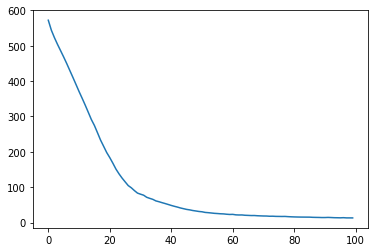

In [60]:
plt.plot(loss)